In [2]:
import pandas as pd

import numpy as np

alexa_data = pd.read_csv("C:/Users/shagu/Downloads/amazon_alexa.tsv",sep='\t')
alexa_data.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [3]:
alexa_data = alexa_data[alexa_data.rating!=5]
alexa_data = alexa_data[alexa_data.rating!=4]
alexa_data.head()

,rating,date,variation,verified_reviews,feedback
6,3,31-Jul-18,Sandstone Fabric,"Without having a cellphone, I cannot use many ...",1
24,3,30-Jul-18,Sandstone Fabric,"I got a second unit for the bedroom, I was exp...",1
33,3,30-Jul-18,Heather Gray Fabric,The speakers sound pretty good for being so sm...,1
46,2,30-Jul-18,Charcoal Fabric,"It's like Siri, in fact, Siri answers more acc...",0
49,3,30-Jul-18,Charcoal Fabric,No different than Apple. To play a specific li...,1


In [146]:
alexa_data.shape
alexa_data.info()#check for null values

<class 'pandas.core.frame.DataFrame'>
Int64Index: 409 entries, 6 to 3141
Data columns (total 5 columns):
rating              409 non-null int64
date                409 non-null object
variation           409 non-null object
verified_reviews    409 non-null object
feedback            409 non-null int64
dtypes: int64(2), object(3)
memory usage: 19.2+ KB


In [4]:
alexa_data["index"] = range(0,409)
alexa_data = alexa_data.set_index("index")
alexa_data.head()

,rating,date,variation,verified_reviews,feedback
index,,,,,
0,3,31-Jul-18,Sandstone Fabric,"Without having a cellphone, I cannot use many ...",1
1,3,30-Jul-18,Sandstone Fabric,"I got a second unit for the bedroom, I was exp...",1
2,3,30-Jul-18,Heather Gray Fabric,The speakers sound pretty good for being so sm...,1
3,2,30-Jul-18,Charcoal Fabric,"It's like Siri, in fact, Siri answers more acc...",0
4,3,30-Jul-18,Charcoal Fabric,No different than Apple. To play a specific li...,1


In [6]:
alexa_data['review_length']=alexa_data['verified_reviews'].apply(len)


In [149]:
alexa_data.head()

,rating,date,variation,verified_reviews,feedback,review_length
index,,,,,,
0,3,31-Jul-18,Sandstone Fabric,"Without having a cellphone, I cannot use many ...",1,365
1,3,30-Jul-18,Sandstone Fabric,"I got a second unit for the bedroom, I was exp...",1,179
2,3,30-Jul-18,Heather Gray Fabric,The speakers sound pretty good for being so sm...,1,308
3,2,30-Jul-18,Charcoal Fabric,"It's like Siri, in fact, Siri answers more acc...",0,163
4,3,30-Jul-18,Charcoal Fabric,No different than Apple. To play a specific li...,1,208


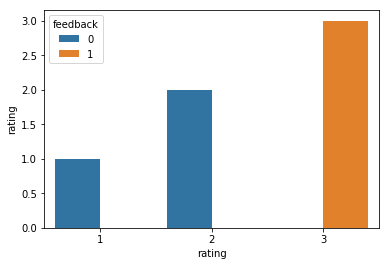

In [96]:
# to look for feedback distribution
import seaborn as sns
import numpy as np
sns.barplot(x='rating',y='rating',hue='feedback',data=alexa_data)

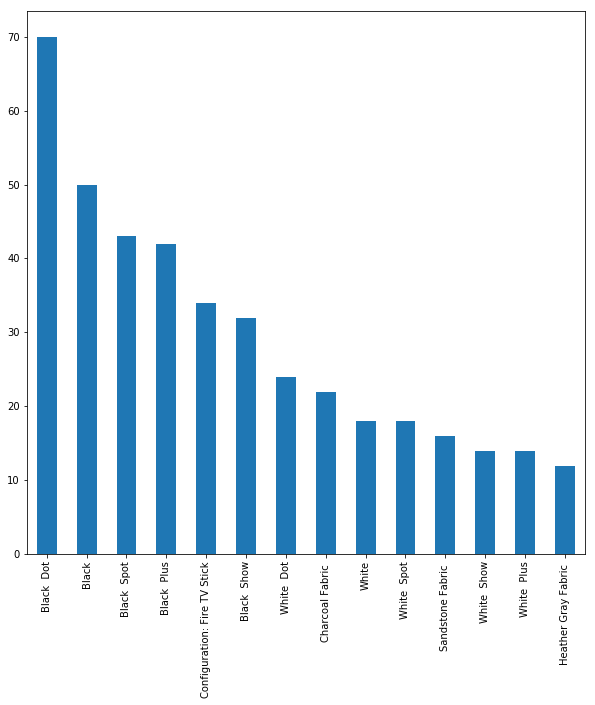

In [109]:

plt.figure(figsize=(10,10))
alexa_data.variation.value_counts().plot(kind='bar')

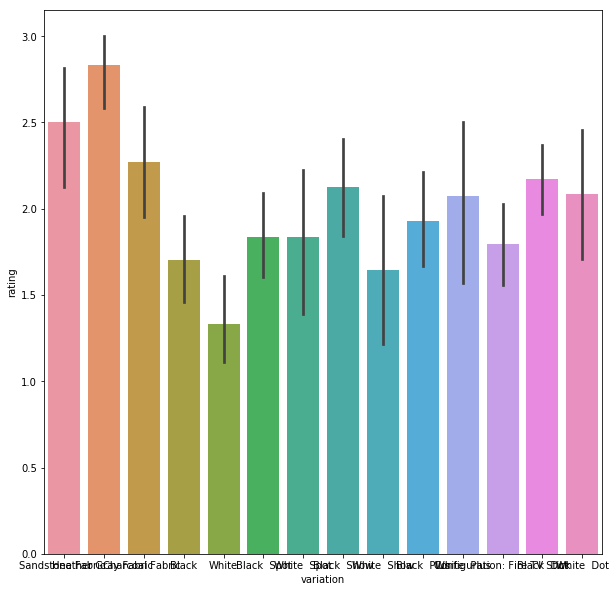

In [111]:
plt.figure(figsize= (10,10))
sns.barplot(x='variation',y='rating',data=alexa_data);

In [8]:
import os
import matplotlib.pyplot as plt
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import word_tokenize

STOPWORDS = set(stopwords.words('english'))
corpus=[]
for i in range(0,409):
    review = re.sub('[^a-zA-Z]', ' ', alexa_data['verified_reviews'][i])
    review = review.lower()
    review = review.split()
    stemmer = PorterStemmer()
    review = [stemmer.stem(token) for token in review if not token in STOPWORDS]
    #contain all words that are not in stopwords dictionary
    review=' '.join(review)
    corpus.append(review)
corpus

['without cellphon cannot use mani featur ipad see use great alarm u r almost deaf hear alarm bedroom live room reason enough keep fun ask random question hear respons seem smartbon polit yet',
 'got second unit bedroom expect sound improv didnt realli see differ overal big improv st gener',
 'speaker sound pretti good small setup pretti easi bought two reason rate follow instruct synch music unit know done correctli sync primari motiv purchas multipl unit',
 'like siri fact siri answer accur alexa see real need household though good bargain prime day deal',
 'differ appl play specif list music must amazon spotifi plu prime etc account must pay play music star reason everyth els',
 'like googl better',
 'sound terribl u want good music get bose',
 'much featur',
 'annoy everyth show alexa abl download spend much time tri figur phrase machin may well look',
 'know half thing ask recogn sprinkler wifi control even though product detail say compat program chang wifi thermostat set match w

In [11]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words='english')
counts = cv.fit_transform(alexa_data['verified_reviews'])
print(counts.shape)
print(cv.get_feature_names())

(409, 1783)
['00', '000', '07', '10', '100', '12', '129', '15', '18', '19', '1990', '1st', '20', '200', '2017', '229', '23', '24', '25', '29', '2nd', '30', '30pm', '34', '39', '3rd', '3x', '40', '48', '4th', '5am', '5ghz', '600', '79', '888', '99', 'a1', 'abay', 'abc', 'ability', 'able', 'absolutely', 'accent', 'acceptable', 'access', 'accesss', 'accident', 'accompanying', 'accomplish', 'accomplished', 'according', 'account', 'accounts', 'accuracy', 'accurately', 'acknowledge', 'act', 'acting', 'action', 'activated', 'activates', 'actively', 'actually', 'ad', 'adapter', 'add', 'added', 'adding', 'additionally', 'adjust', 'ads', 'advance', 'advanced', 'advantage', 'advertised', 'advertisement', 'advertising', 'advise', 'advised', 'aesthetic', 'af', 'afraid', 'ago', 'ai', 'aint', 'alarm', 'alarms', 'albeit', 'alert', 'alerts', 'alex', 'alexa', 'alexas', 'alexi', 'alexia', 'algo', 'allow', 'amazingly', 'amazon', 'amazons', 'american', 'americans', 'amused', 'annoying', 'answer', 'answerin

In [12]:
all_words = []
for i in range(0,len(corpus)):
    all_words = all_words + (re.findall(r'\w+', corpus[i]))
all_words

['without',
 'cellphon',
 'cannot',
 'use',
 'mani',
 'featur',
 'ipad',
 'see',
 'use',
 'great',
 'alarm',
 'u',
 'r',
 'almost',
 'deaf',
 'hear',
 'alarm',
 'bedroom',
 'live',
 'room',
 'reason',
 'enough',
 'keep',
 'fun',
 'ask',
 'random',
 'question',
 'hear',
 'respons',
 'seem',
 'smartbon',
 'polit',
 'yet',
 'got',
 'second',
 'unit',
 'bedroom',
 'expect',
 'sound',
 'improv',
 'didnt',
 'realli',
 'see',
 'differ',
 'overal',
 'big',
 'improv',
 'st',
 'gener',
 'speaker',
 'sound',
 'pretti',
 'good',
 'small',
 'setup',
 'pretti',
 'easi',
 'bought',
 'two',
 'reason',
 'rate',
 'follow',
 'instruct',
 'synch',
 'music',
 'unit',
 'know',
 'done',
 'correctli',
 'sync',
 'primari',
 'motiv',
 'purchas',
 'multipl',
 'unit',
 'like',
 'siri',
 'fact',
 'siri',
 'answer',
 'accur',
 'alexa',
 'see',
 'real',
 'need',
 'household',
 'though',
 'good',
 'bargain',
 'prime',
 'day',
 'deal',
 'differ',
 'appl',
 'play',
 'specif',
 'list',
 'music',
 'must',
 'amazon',
 'sp

In [13]:
from collections import Counter
words_counts = Counter(all_words)
print(words_counts)

Counter({'echo': 150, 'work': 140, 'alexa': 108, 'devic': 108, 'use': 88, 'amazon': 84, 'like': 81, 'get': 77, 'dot': 76, 'time': 73, 'sound': 71, 'would': 70, 'speaker': 69, 'music': 60, 'one': 58, 'product': 57, 'tri': 53, 'thing': 53, 'play': 52, 'set': 51, 'need': 48, 'ask': 44, 'want': 44, 'buy': 44, 'connect': 43, 'screen': 43, 'better': 41, 'also': 41, 'qualiti': 40, 'show': 38, 'realli': 37, 'bought': 37, 'even': 37, 'good': 36, 'turn': 36, 'hub': 34, 'know': 33, 'well': 33, 'great': 32, 'much': 31, 'disappoint': 31, 'bulb': 31, 'could': 30, 'still': 30, 'alarm': 29, 'prime': 29, 'day': 29, 'light': 29, 'app': 27, 'back': 27, 'say': 26, 'return': 26, 'home': 26, 'see': 25, 'googl': 25, 'make': 25, 'purchas': 24, 'problem': 24, 'phone': 24, 'hear': 23, 'got': 23, 'stop': 23, 'go': 23, 'seem': 22, 'way': 22, 'money': 22, 'refurbish': 22, 'video': 22, 'question': 21, 'unit': 21, 'wifi': 21, 'mani': 20, 'differ': 20, 'plu': 20, 'understand': 20, 'sure': 20, 'item': 20, 'start': 20,

In [14]:
most_common_words = sorted(words_counts.items(), key=lambda x: x[1], reverse=True)
most_common_words

[('echo', 150),
 ('work', 140),
 ('alexa', 108),
 ('devic', 108),
 ('use', 88),
 ('amazon', 84),
 ('like', 81),
 ('get', 77),
 ('dot', 76),
 ('time', 73),
 ('sound', 71),
 ('would', 70),
 ('speaker', 69),
 ('music', 60),
 ('one', 58),
 ('product', 57),
 ('tri', 53),
 ('thing', 53),
 ('play', 52),
 ('set', 51),
 ('need', 48),
 ('ask', 44),
 ('want', 44),
 ('buy', 44),
 ('connect', 43),
 ('screen', 43),
 ('better', 41),
 ('also', 41),
 ('qualiti', 40),
 ('show', 38),
 ('realli', 37),
 ('bought', 37),
 ('even', 37),
 ('good', 36),
 ('turn', 36),
 ('hub', 34),
 ('know', 33),
 ('well', 33),
 ('great', 32),
 ('much', 31),
 ('disappoint', 31),
 ('bulb', 31),
 ('could', 30),
 ('still', 30),
 ('alarm', 29),
 ('prime', 29),
 ('day', 29),
 ('light', 29),
 ('app', 27),
 ('back', 27),
 ('say', 26),
 ('return', 26),
 ('home', 26),
 ('see', 25),
 ('googl', 25),
 ('make', 25),
 ('purchas', 24),
 ('problem', 24),
 ('phone', 24),
 ('hear', 23),
 ('got', 23),
 ('stop', 23),
 ('go', 23),
 ('seem', 22),
 (

In [16]:
most_commmom_wordList = []
most_commmom_CountList = []
for x, y in most_common_words:
    most_commmom_wordList.append(x)
    most_commmom_CountList.append(y)

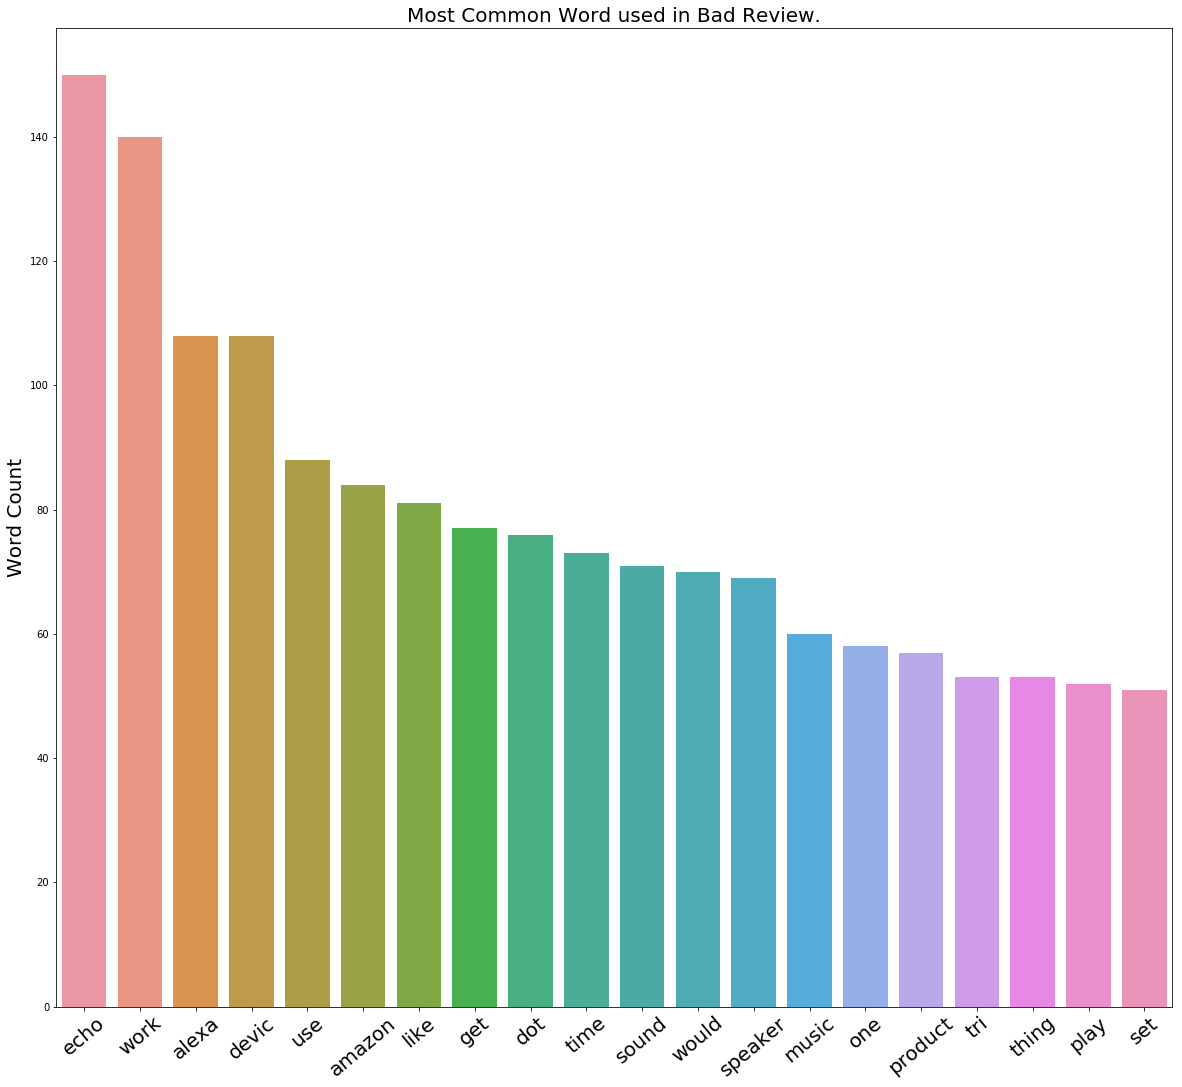

In [156]:
import seaborn as sns
plt.figure(figsize=(20,18))
plot = sns.barplot(np.arange(20), most_commmom_CountList[0:20])
plt.ylabel('Word Count',fontsize=20)
plt.xticks(np.arange(20), most_commmom_wordList[0:20], fontsize=20, rotation=40)
plt.title('Most Common Word used in Bad Review.', fontsize=20)
plt.show()

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
Vectorize = TfidfVectorizer(analyzer='word',stop_words='english',ngram_range=(1, 2),min_df=2)
X = Vectorize.fit_transform(corpus).toarray()
y = alexa_data['feedback']


In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score,roc_curve,auc

In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold, cross_val_score

rf = RandomForestClassifier()

k_fold = KFold(n_splits=5)

cross_val_score(rf, X, Y, cv=k_fold, scoring='accuracy')

NameError: name 'Y' is not defined

In [162]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=None)

In [164]:
model1 = RandomForestClassifier(n_estimators=10, max_features="auto")
model1.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [165]:
y_pred1 = model1.predict(x_test)
accuracy1 = accuracy_score(y_test,y_pred1)
print("Accuracy for RandomForest:\t"+str(accuracy1))
print("Precision for RandomForest:\t"+str(precision_score(y_test,y_pred1)))
print("Recall for RandomForest:\t"+str(recall_score(y_test,y_pred1)))

Accuracy for RandomForest:	0.7281553398058253
Precision for RandomForest:	0.7037037037037037
Recall for RandomForest:	0.48717948717948717


In [166]:
model2 = GradientBoostingClassifier(learning_rate=1.5, verbose=1, max_features='auto')
model2.fit(x_train,y_train)

      Iter       Train Loss   Remaining Time 
         1           1.1294            0.99s
         2           1.0226            1.37s
         3           0.9237            1.55s
         4           0.8513            1.56s
         5           0.7752            1.55s
         6           0.7161            1.56s
         7           0.6524            1.55s
         8           0.5837            1.53s
         9           0.5064            1.53s
        10           0.4648            1.52s
        20           0.2152            1.20s
        30           0.1604            1.06s
        40           0.1396            0.88s
        50           0.1257            0.77s
        60           0.1200            0.61s
        70           0.1165            0.46s
        80           0.1151            0.30s
        90           0.1143            0.15s
       100           0.1137            0.00s


GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=1.5, loss='deviance', max_depth=3,
              max_features='auto', max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=1, warm_start=False)

In [167]:
y_pred2 = model2.predict(x_test)
accuracy2 = accuracy_score(y_test,y_pred2)
print("Accuracy for GradientBoosting:\t"+str(accuracy2))
print("Precision for GradientBoosting:\t"+str(precision_score(y_test,y_pred2)))
print("Recall for GradientBoosting:\t"+str(recall_score(y_test,y_pred2)))

Accuracy for GradientBoosting:	0.7281553398058253
Precision for GradientBoosting:	0.6896551724137931
Recall for GradientBoosting:	0.5128205128205128


In [168]:
prob_1=model1.predict_proba(x_test)
prob_1 = prob_1[:,1]# Probalility prediction for Rangomforest classifier
prob_2=model2.predict_proba(x_test)
prob_2 = prob_2[:,1]# Probalility prediction for GradientBoosting classifier

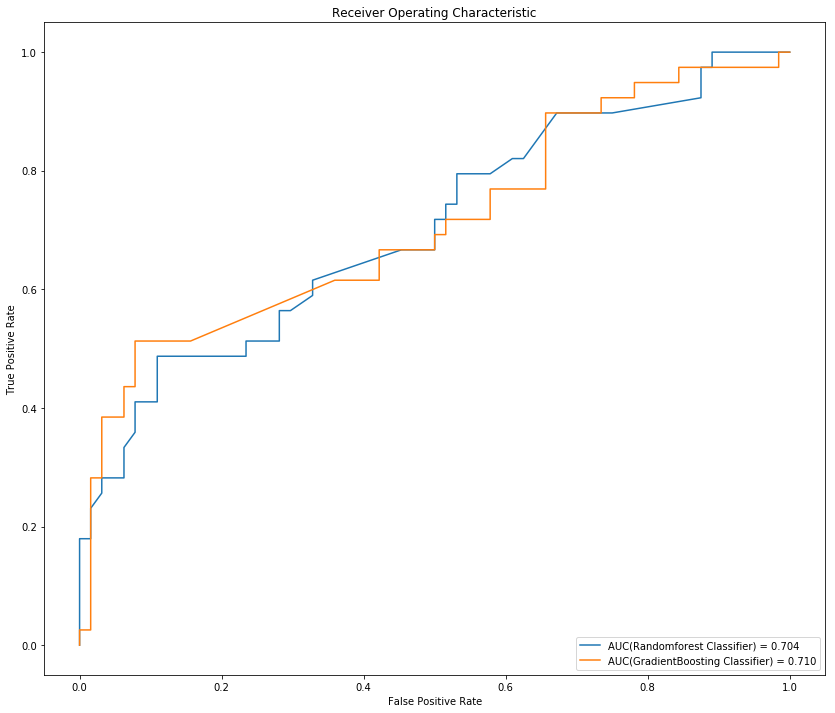

In [171]:
fpr1, tpr1, _ = roc_curve(y_test, prob_1)
fpr2, tpr2, _ = roc_curve(y_test, prob_2)
plt.figure(figsize=(14,12))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr1, tpr1, label = 'AUC(Randomforest Classifier) = %0.3f' % auc(fpr1, tpr1))
plt.plot(fpr2, tpr2, label = 'AUC(GradientBoosting Classifier) = %0.3f' % auc(fpr2, tpr2))
plt.legend(loc = 'lower right')

plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [172]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

model = DecisionTreeClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("Training Accuracy :", model.score(x_train, y_train))
print("Testing Accuracy :", model.score(x_test, y_test))

cm = confusion_matrix(y_test, y_pred)
print(cm)

Training Accuracy : 0.9673202614379085
Testing Accuracy : 0.6893203883495146
[[53 11]
 [21 18]]


In [ ]:
reviews = alexa_data['verified_reviews']
len_review = []
for review in reviews:
    len_review.append(len(review))

alexa_data['len_of_reviews'] = len_review

In [23]:
alexa_data['len_of_reviews'][0], alexa_data['verified_reviews'][0]

(365,
 'Without having a cellphone, I cannot use many of her features. I have an iPad but do not see that of any use.  It IS a great alarm.  If u r almost deaf, you can hear her alarm in the bedroom from out in the living room, so that is reason enough to keep her.It is fun to ask random questions to hear her response.  She does not seem to be very smartbon politics yet.')

In [26]:
alexa_data['Year'] = pd.DatetimeIndex(alexa_data['date']).year
alexa_data['Month'] = pd.DatetimeIndex(alexa_data['date']).month
alexa_data['Day'] = pd.DatetimeIndex(alexa_data['date']).day
alexa_data = alexa_data.drop(['date'], axis = 1)
alexa_data.head()
alexa_data.columns

Index(['rating', 'variation', 'verified_reviews', 'feedback', 'len_of_reviews',
       'Year', 'Month', 'Day'],
      dtype='object')

In [34]:
alexa_data.drop('Year',axis=1)
alexa_data.drop('Month',axis=1)

,rating,variation,verified_reviews,feedback,len_of_reviews,Year,Day
index,,,,,,,
0,3,Sandstone Fabric,"Without having a cellphone, I cannot use many ...",1,365,2018,31
1,3,Sandstone Fabric,"I got a second unit for the bedroom, I was exp...",1,179,2018,30
2,3,Heather Gray Fabric,The speakers sound pretty good for being so sm...,1,308,2018,30
3,2,Charcoal Fabric,"It's like Siri, in fact, Siri answers more acc...",0,163,2018,30
4,3,Charcoal Fabric,No different than Apple. To play a specific li...,1,208,2018,30
5,3,Sandstone Fabric,like google better,1,18,2018,30
6,2,Charcoal Fabric,Sound is terrible if u want good music too get...,0,53,2018,30
7,1,Charcoal Fabric,Not much features.,0,18,2018,30
8,3,Sandstone Fabric,it's annoying that everything they show Alexa ...,1,211,2018,30


In [36]:
from sklearn.feature_extraction.text import TfidfVectorizer
tdf = TfidfVectorizer(stop_words='english')
pd.DataFrame(tdf.fit_transform(alexa_data['verified_reviews']).toarray())

,0,1,2,3,4,5,6,7,8,9,...,1773,1774,1775,1776,1777,1778,1779,1780,1781,1782
0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0


In [37]:
tdf_data = pd.DataFrame(tdf.fit_transform(alexa_data['verified_reviews']).toarray())

In [39]:
pd.DataFrame(tdf.fit_transform(alexa_data['variation']).toarray())

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.000000,0.000000,0.0,0.000000,0.593469,0.000000,0.000000,0.0,0.804857,0.0,0.0,0.0,0.000000
1,0.000000,0.000000,0.0,0.000000,0.593469,0.000000,0.000000,0.0,0.804857,0.0,0.0,0.0,0.000000
2,0.000000,0.000000,0.0,0.000000,0.439992,0.634983,0.634983,0.0,0.000000,0.0,0.0,0.0,0.000000
3,0.000000,0.782853,0.0,0.000000,0.622207,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000
4,0.000000,0.782853,0.0,0.000000,0.622207,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000
5,0.000000,0.000000,0.0,0.000000,0.593469,0.000000,0.000000,0.0,0.804857,0.0,0.0,0.0,0.000000
6,0.000000,0.782853,0.0,0.000000,0.622207,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000
7,0.000000,0.782853,0.0,0.000000,0.622207,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000
8,0.000000,0.000000,0.0,0.000000,0.593469,0.000000,0.000000,0.0,0.804857,0.0,0.0,0.0,0.000000
9,0.000000,0.000000,0.0,0.000000,0.439992,0.634983,0.634983,0.0,0.000000,0.0,0.0,0.0,0.000000


In [49]:
tdf_data_v = pd.DataFrame(tdf.fit_transform(alexa_data['variation']).toarray())

In [52]:
X = pd.concat([alexa_data['rating'], tdf_data,tdf_data_v ,alexa_data['Day'], alexa_data['Year'], alexa_data['len_of_reviews']], axis=1)

In [53]:
X.head()

,rating,0,1,2,3,4,5,6,7,8,...,6,7,8,9,10,11,12,Day,Year,len_of_reviews
0,3,0.0,0.000000,0.0,0.0,0.593469,0.000000,0.000000,0.0,0.804857,...,0.000000,0.0,0.804857,0.0,0.0,0.0,0.0,31,2018,365
1,3,0.0,0.000000,0.0,0.0,0.593469,0.000000,0.000000,0.0,0.804857,...,0.000000,0.0,0.804857,0.0,0.0,0.0,0.0,30,2018,179
2,3,0.0,0.000000,0.0,0.0,0.439992,0.634983,0.634983,0.0,0.000000,...,0.634983,0.0,0.000000,0.0,0.0,0.0,0.0,30,2018,308
3,2,0.0,0.782853,0.0,0.0,0.622207,0.000000,0.000000,0.0,0.000000,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,30,2018,163
4,3,0.0,0.782853,0.0,0.0,0.622207,0.000000,0.000000,0.0,0.000000,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,30,2018,208


In [54]:
Y=alexa_data['feedback']

In [56]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold, cross_val_score

rf = RandomForestClassifier()

k_fold = KFold(n_splits=5)

cross_val_score(rf, X, Y, cv=k_fold, scoring='accuracy')

C:\Users\shagu\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\shagu\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\shagu\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\shagu\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\shagu\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: F

array([1.        , 1.        , 0.96341463, 1.        , 1.        ])

In [57]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

In [58]:
rf = RandomForestClassifier()
fit_model = rf.fit(X_train, Y_train)

C:\Users\shagu\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [59]:
Y_pred = rf.predict(X_test)

In [62]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score

In [64]:
print("==============================================")
print("For Random Forest Classifier:\n")
print("Accuracy Score: ",accuracy_score(Y_test, Y_pred))
print("Precision Score: ",precision_score(Y_test, Y_pred))
print("Recall Score: ",recall_score(Y_test, Y_pred))
print("F1 Score: ",f1_score(Y_test, Y_pred))
print("Confusion Matrix:\t \n",confusion_matrix(Y_test, Y_pred))

print("==============================================")

For Random Forest Classifier:

Accuracy Score:  0.991869918699187
Precision Score:  1.0
Recall Score:  0.975
F1 Score:  0.9873417721518987
Confusion Matrix:	 
 [[83  0]
 [ 1 39]]


In [66]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
gbc.fit(X_train, Y_train)
Y_pred = rf.predict(X_test)

print("==============================================")
print("For Gradient Boosting Classifier:\n")
print("Accuracy Score: ",accuracy_score(Y_test, Y_pred))
print("Precision Score: ",precision_score(Y_test, Y_pred))
print("Recall Score: ",recall_score(Y_test, Y_pred))
print("F1 Score: ",f1_score(Y_test, Y_pred))
print("Confusion Matrix:\t \n",confusion_matrix(Y_test, Y_pred))
print("==============================================")

For Gradient Boosting Classifier:

Accuracy Score:  0.991869918699187
Precision Score:  1.0
Recall Score:  0.975
F1 Score:  0.9873417721518987
Confusion Matrix:	 
 [[83  0]
 [ 1 39]]


In [71]:
results = pd.DataFrame(data = {'Y Test': Y_test, 'Y Predictions': Y_pred})

In [68]:
results.head()

,Y Test,Y Predictions
index,,
130,0,0
129,0,0
187,0,0
60,0,0
119,1,1
